# **CLASIFICACIÓN DE ERUPCIONES VOLCÁNICAS**

---



# **TAREA 1. EXPLORACIÓN PREVIA DE LOS DATOS**

###1.1 Importación de paquetes

In [253]:
# Importación de paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Paquetes de modelos de ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Paquetes de evaluacion de precisión
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

###1.2 Lectura de datasets

In [254]:
#Creación de variables donde se cargan los dataset
df_train = pd.read_csv('jm_train.csv', sep = ',', na_values='#N/D')
df_test = pd.read_csv('jm_X_test.csv', sep = ',', na_values='#N/D')


In [255]:
#Visualización de los dataset
df_train.head(6)

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
5,-0.318657,1.494771,1.016929,-0.406147,1.404118,-0.079592,2


In [256]:
df_test.head(6)

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644
5,-1.259524,-0.298085,2.043900,-0.945770,2.108906,0.622710


In [257]:
#Información de los dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


In [258]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  900 non-null    float64
 1   feature2  900 non-null    float64
 2   feature3  900 non-null    float64
 3   feature4  900 non-null    float64
 4   feature5  900 non-null    float64
 5   feature6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


In [259]:
#Modificación de los nombres de las columnas de ambos dataset para una mejor interpretación de los datos
df_train.columns = ['medicion_s1', 'medicion_s2', 'medicion_s3', 'medicion_s4', 'medicion_s5', 'medicion_s6', 'tipo_erupcion']
df_test.columns = ['medicion_s1', 'medicion_s2', 'medicion_s3', 'medicion_s4', 'medicion_s5', 'medicion_s6']

In [260]:
#Visualización de los cambios realizados
df_train.head(2)

,medicion_s1,medicion_s2,medicion_s3,medicion_s4,medicion_s5,medicion_s6,tipo_erupcion
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0


In [261]:
df_test.head(2)

,medicion_s1,medicion_s2,medicion_s3,medicion_s4,medicion_s5,medicion_s6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068


**Observaciones:**

**df_train**
*   Se observa que el dataset de entrenamiento cuenta con ***2100 registros***.
*   Además, se puede afirmar que todos las variables son **númericas**. Las columnas features, **decimales** y la columna target, **enteros**.
*    Como primera aproximación, previa confirmación posterior, se puede decir que el dataset no cuenta con valores nulos.

**df_test**
*   Se observa que el dataset de testeo cuenta con ***900 registros***.
*   Además, se puede afirmar que todos los registros son **números decimales**.
*   Como primera aproximación (previa confirmación posterior) se puede decir que el dataset **no cuenta con valores nulos**.


### 1.3 Análisis de valores perdidos o nulos

In [262]:
#Se buscan valores nulos o valores perdidos en df_train, se suman los totales de los mismos de cada variable y se los ordena.
df_train.isnull().sum().sort_values(ascending=False)

medicion_s1      0
medicion_s2      0
medicion_s3      0
medicion_s4      0
medicion_s5      0
medicion_s6      0
tipo_erupcion    0
dtype: int64

In [263]:
#Se buscan valores nulos o valores perdidos en df_test, se suman los totales de los mismos de cada variable y se los ordena.
df_test.isnull().sum().sort_values(ascending=False)

medicion_s1    0
medicion_s2    0
medicion_s3    0
medicion_s4    0
medicion_s5    0
medicion_s6    0
dtype: int64

**Conclusiones:** Se comfirma primera observación respecto a que los dataset no cuenta con valores nulos o perdidos.


###1.4 Análisis exploratorio de variables numéricas (EDA)

Se crea una funcion escalable, para poder analizar con datos estadisticos las variables numéricas que contienen los datasets.

In [264]:
def ft_estadisticos(num):
  #Se calcula describe, que devuelve caracteristicas descriptivas
  estadisticos = num.describe().T
  #Se añade la mediana
  estadisticos['median'] = num.median()
  #Se reordenan las columnas para que la mediana esté al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #Se revuelven resultados
  return(estadisticos)

In [265]:
#Datos estadísticos del dataset df_train
ft_estadisticos(df_train.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
medicion_s1,2100.0,-0.204656,-0.443868,1.543613,-6.683655,-1.171340,-0.443868,0.890023,4.565547
medicion_s2,2100.0,0.199249,0.320507,1.614024,-5.383371,-0.877386,0.320507,1.321430,6.700133
medicion_s3,2100.0,-0.378140,-0.439745,1.450548,-6.147055,-1.365990,-0.439745,0.662898,4.157518
medicion_s4,2100.0,-0.206425,-0.176504,1.442225,-5.653594,-1.259403,-0.176504,0.866879,4.371912
medicion_s5,2100.0,-0.186419,-0.195751,1.501573,-5.912521,-1.211685,-0.195751,0.851843,5.068783
medicion_s6,2100.0,-0.433229,-0.406754,1.188791,-4.433189,-1.131944,-0.406754,0.348593,4.016324
tipo_erupcion,2100.0,1.980476,2.000000,1.410537,0.000000,1.000000,2.000000,3.000000,4.000000


In [266]:
#Datos estadísticos del dataset df_test
ft_estadisticos(df_test.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
medicion_s1,900.0,-0.170339,-0.386297,1.485402,-5.084203,-1.098759,-0.386297,0.881170,4.636012
medicion_s2,900.0,0.135481,0.341427,1.547202,-4.292548,-0.934171,0.341427,1.246296,4.612113
medicion_s3,900.0,-0.447035,-0.464239,1.394437,-4.628992,-1.460497,-0.464239,0.626893,3.299946
medicion_s4,900.0,-0.201708,-0.177710,1.487102,-6.732089,-1.163163,-0.177710,0.870332,5.996929
medicion_s5,900.0,-0.263349,-0.233699,1.450823,-5.196997,-1.182667,-0.233699,0.679282,3.917118
medicion_s6,900.0,-0.445490,-0.410182,1.215000,-4.823971,-1.152891,-0.410182,0.399597,5.357953


### 1.5 Visualización de variables numéricas

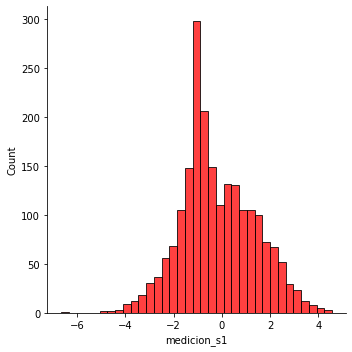

In [267]:
#Visualización de medicion_s1
sns.displot(df_train['medicion_s1'], kde=False, color= 'r')

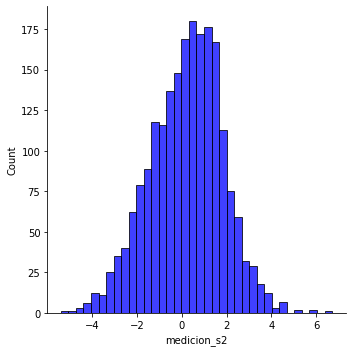

In [268]:
#Visualización de medicion_s2
sns.displot(df_train['medicion_s2'], kde=False, color= 'b')

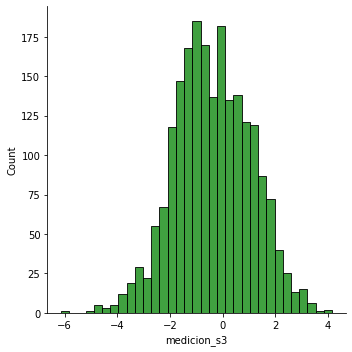

In [269]:
#Visualización de medicion_s3
sns.displot(df_train['medicion_s3'], kde=False, color= 'g')

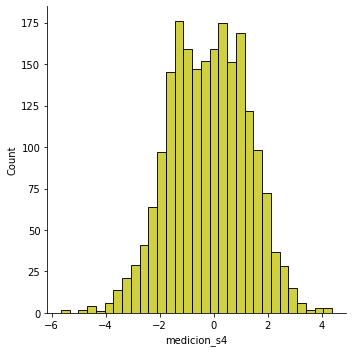

In [270]:
#Visualización de medicion_s4
sns.displot(df_train['medicion_s4'], kde=False, color= 'y')

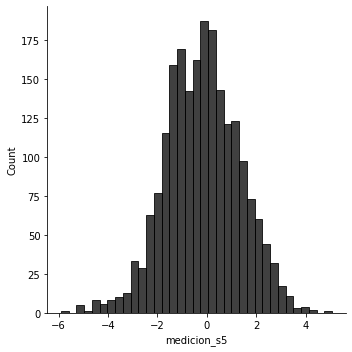

In [271]:
#Visualización de medicion_s5
sns.displot(df_train['medicion_s5'], kde=False, color= 'k')

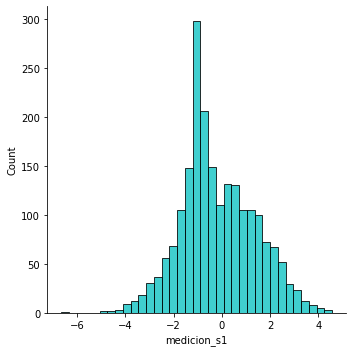

In [272]:
#Visualización de medicion_s6
sns.displot(df_train['medicion_s1'], kde=False, color= 'c')

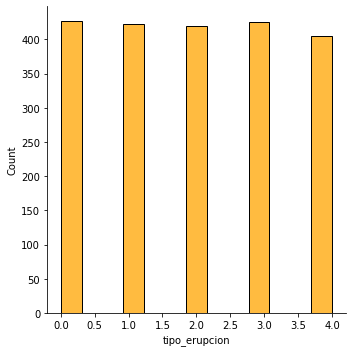

In [273]:
#Visualización de tipo_erupcion
sns.displot(df_train['tipo_erupcion'], kde=False, color= 'orange')

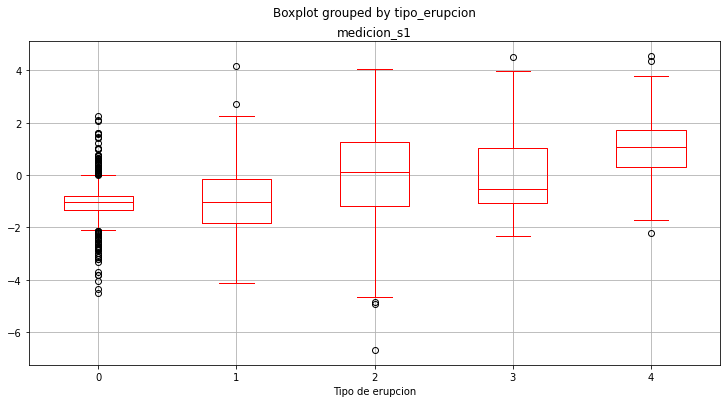

In [274]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s1
temp = df_train.boxplot(column="medicion_s1", by="tipo_erupcion", figsize=(12,6), color='r')
plt.xlabel("Tipo de erupcion")
plt.show()

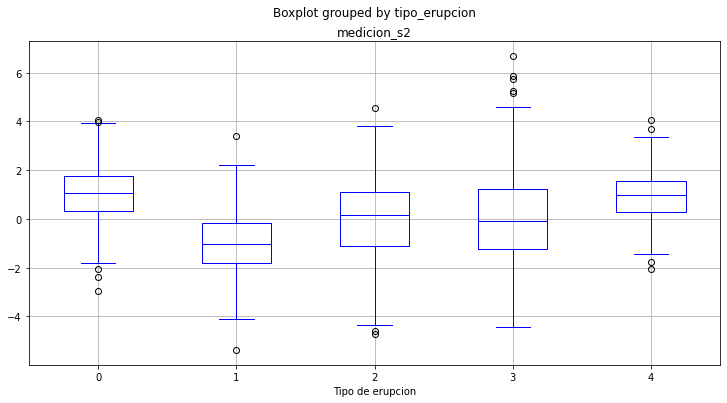

In [275]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s2
temp = df_train.boxplot(column="medicion_s2", by="tipo_erupcion", figsize=(12,6), color='b')
plt.xlabel("Tipo de erupcion")
plt.show()

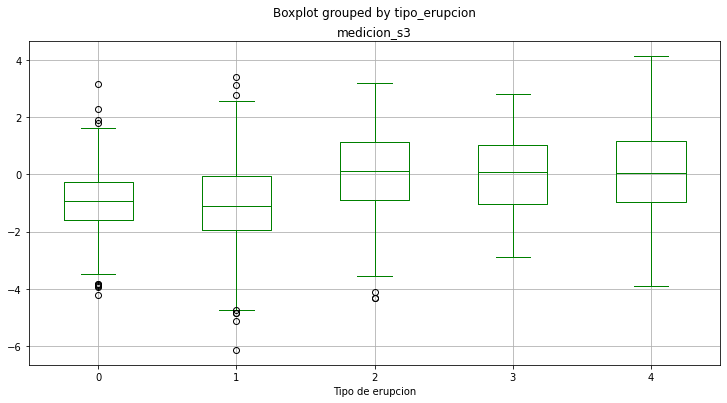

In [276]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s3
temp = df_train.boxplot(column="medicion_s3", by="tipo_erupcion", figsize=(12,6), color='g')
plt.xlabel("Tipo de erupcion")
plt.show()

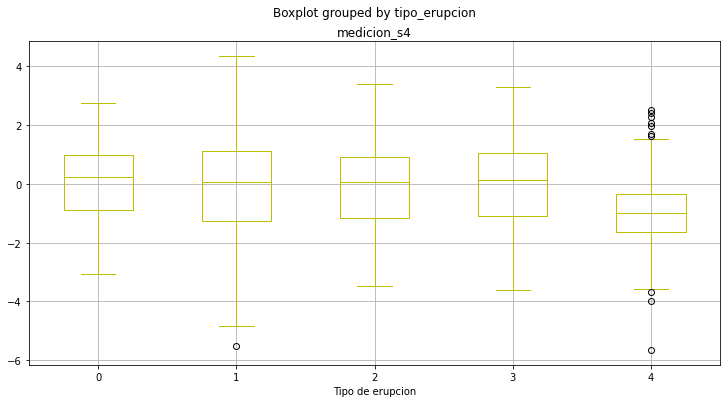

In [277]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s4
temp = df_train.boxplot(column="medicion_s4", by="tipo_erupcion", figsize=(12,6), color='y')
plt.xlabel("Tipo de erupcion")
plt.show()

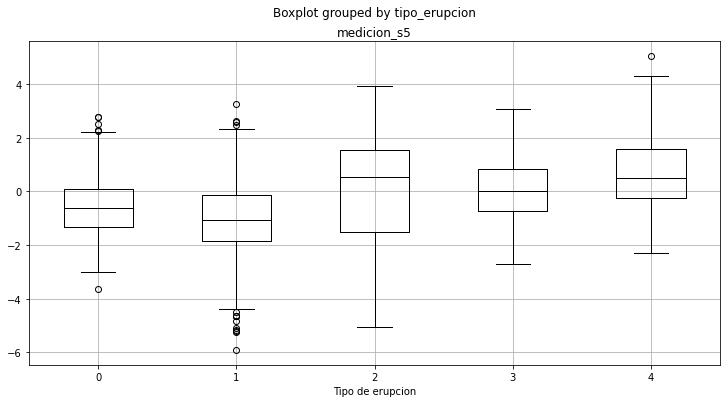

In [278]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s5
temp = df_train.boxplot(column="medicion_s5", by="tipo_erupcion", figsize=(12,6), color='k')
plt.xlabel("Tipo de erupcion")
plt.show()

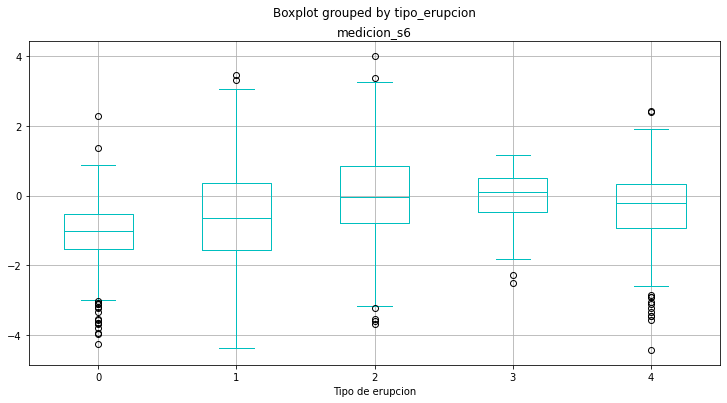

In [279]:
#Visualización gráfico de caja y bigotes: tipo_erupcion vs medicion_s6
temp = df_train.boxplot(column="medicion_s6", by="tipo_erupcion", figsize=(12,6), color='c')
plt.xlabel("Tipo de erupcion")
plt.show()

# **TAREA 2: MODELADO DEL ALGORITMO PREDICTIVO**

### 2.1 Pre-procesamiento de datos

Funcion escalabre de control de valores irregulares en columnas


In [280]:
for col in ['tipo_erupcion']:
    print(f"-----{col}-----")
    print("Valores únicos :", df_train[col].unique())

-----tipo_erupcion-----
Valores únicos : [4 0 1 3 2]


###2.2 Separación de variables: features (variables predictoras) y labels (variables target)

In [281]:
#Separación de variables:

#Variables features (predictoras) = mediciones
train_mediciones_features = df_train.drop(columns='tipo_erupcion')

#Variable label (target) = tipo_erupcion
train_tipo_erupcion_label = df_train['tipo_erupcion']

In [282]:
#Visualización
train_mediciones_features.head(6)


,medicion_s1,medicion_s2,medicion_s3,medicion_s4,medicion_s5,medicion_s6
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490
5,-0.318657,1.494771,1.016929,-0.406147,1.404118,-0.079592


In [283]:
train_tipo_erupcion_label.head(6)

0    4
1    0
2    1
3    3
4    0
5    2
Name: tipo_erupcion, dtype: int64

### 2.3 Separación de los datos: conjunto entrenamiento (train) y conjunto validación (validation)

In [284]:
#Separación de datos: entrenamiento (train) y validación (validate). 70% train 30% validate
train_mediciones, validate_mediciones, train_tipo_erupcion, validate_tipo_erupcion = train_test_split(train_mediciones_features, train_tipo_erupcion_label, test_size=0.3, random_state=42)

In [285]:
train_mediciones

,medicion_s1,medicion_s2,medicion_s3,medicion_s4,medicion_s5,medicion_s6
906,0.102474,1.160356,-0.316968,1.304684,-0.549226,0.031494
199,-1.136200,1.811533,-1.950790,-0.483357,-1.019622,-2.247141
1302,3.632941,-3.290851,2.734505,0.938769,1.099058,4.016324
1179,-0.863491,0.917876,0.954894,-0.351571,1.202882,-0.061716
1493,2.059814,0.982491,-2.185012,2.271797,-2.643187,-0.149169
...,...,...,...,...,...,...
1638,0.424864,-1.297168,-0.244367,-0.007067,-0.522335,0.348682
1095,-1.003740,0.388196,-2.317192,-2.607750,-0.779164,-2.905001
1130,-1.599621,3.417978,2.005670,1.239563,2.041648,0.310542
1294,2.483045,-0.200839,-1.783446,-3.289138,-0.246033,-1.781840


In [286]:
validate_mediciones

,medicion_s1,medicion_s2,medicion_s3,medicion_s4,medicion_s5,medicion_s6
1034,-0.892006,1.439997,-0.818899,-1.757583,0.395728,-1.912480
1176,-0.119654,0.623272,1.686464,-3.054672,2.883756,-0.470336
67,-0.607433,-0.633538,0.409086,0.095635,0.173917,0.326162
1330,2.109708,2.259569,0.920400,1.701122,0.564280,1.149038
650,-1.506154,-0.364690,-1.052776,2.013340,-1.806248,-0.078752
...,...,...,...,...,...,...
1817,0.670187,0.426846,-0.344411,-0.078890,-0.175600,-0.200547
570,-0.957922,2.139764,2.265303,-0.964087,2.876682,0.092883
888,0.204601,-0.553506,-0.561479,0.236331,-0.716695,-0.025651
1735,-0.275875,1.882515,-1.340817,1.568883,-1.360953,-0.803700


In [287]:
train_tipo_erupcion

906     4
199     0
1302    2
1179    0
1493    0
       ..
1638    4
1095    0
1130    1
1294    4
860     3
Name: tipo_erupcion, Length: 1470, dtype: int64

In [288]:
validate_tipo_erupcion

1034    0
1176    2
67      3
1330    4
650     3
       ..
1817    4
570     4
888     3
1735    0
465     3
Name: tipo_erupcion, Length: 630, dtype: int64

In [289]:
# Estandarización del conjunto de datos
Scaler = StandardScaler()
train_mediciones = Scaler.fit_transform(train_mediciones)
validate_mediciones = Scaler.fit_transform(validate_mediciones)

### 2.4 Definición del modelo: Random Forest

In [290]:
#Definición modelo: RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

**Entrenamiento:** Se entrena el modelo con el conjunto de datos de entrenamiento: ***train_mediciones y train_tipo_erupcion***

In [291]:
#Entrenamiento:
#Entrenar el modelo con el conjunto de datos de entrenamiento
rf.fit(train_mediciones, train_tipo_erupcion)
#Devuelve Random Forest ya entrenado

RandomForestClassifier(random_state=42)

**Predicción:** Se realizan las predciones con los datos de validación: ***validate_mediciones***

In [292]:
#Predicción:
#Se obtienen predicciones con el conjunto de datos de validación
predicciones_tipo_erupcion = rf.predict(validate_mediciones)
predicciones_tipo_erupcion[:6]

array([0, 4, 3, 4, 1, 4])

**Evaluación:** Se mide la precisión de la predicción con el método **f1-score** entre: **validate_tipo_erupcion y predicciones_tipo_erupcion**

In [293]:
# Evaluación de la precisión: f1-score
print(f1_score(validate_tipo_erupcion, predicciones_tipo_erupcion, average='macro'))

0.7551866326680321


La precisión es de **0.75**. Valor aceptable pero con amplio margen de mejora. *texto en cursiva*

**Test de predicción:** Se realiza la predicción del tipo de erupción para los valores de mediciones contenidos en el dataset **df_test**.


In [294]:
resultados = rf.predict(df_test)

In [295]:
print("Reultados finales Nº 1:\n", resultados)

Reultados finales Nº 1:
 [1 3 2 0 3 2 4 1 2 3 1 4 1 1 4 4 4 4 4 0 1 2 4 0 0 3 2 1 2 4 2 4 4 1 3 1 0
 4 1 0 4 2 3 2 2 0 1 1 0 4 4 0 4 0 4 4 1 3 3 0 1 0 3 1 4 1 1 0 2 1 2 1 4 1
 4 2 2 3 2 3 4 1 1 4 1 1 2 3 1 2 2 4 1 1 0 1 4 2 2 4 2 0 0 4 1 3 4 2 1 1 4
 1 2 3 1 0 1 3 2 0 0 4 4 1 1 2 4 1 3 2 2 1 4 0 0 2 3 0 2 4 0 4 1 2 1 3 3 3
 4 4 1 2 1 2 1 4 1 4 4 2 0 2 3 1 1 4 0 3 0 0 2 2 0 4 1 2 3 0 3 4 2 1 0 4 2
 1 0 3 4 2 1 1 2 4 0 0 0 4 1 2 0 2 4 3 2 2 1 1 1 1 0 0 2 1 1 3 4 2 2 1 2 3
 1 0 3 2 1 2 2 4 0 2 4 3 4 4 0 3 3 3 1 4 3 0 2 2 4 1 2 0 2 3 0 3 1 1 0 3 2
 4 1 1 0 0 2 4 2 4 1 2 1 4 2 0 4 0 1 4 2 4 2 1 3 1 1 4 1 1 2 2 2 1 0 2 0 1
 4 4 1 2 0 4 0 0 4 4 4 1 3 1 3 4 1 4 0 0 4 1 4 4 0 2 1 2 3 1 2 1 3 3 3 0 4
 2 1 1 2 0 2 1 2 3 4 0 3 2 4 4 2 1 0 4 4 0 1 4 3 4 4 1 4 4 3 1 1 2 2 1 1 4
 3 3 2 1 4 4 0 2 4 1 4 0 1 1 4 2 3 2 1 4 4 2 2 3 1 1 2 4 1 4 0 1 1 4 1 0 0
 0 1 0 0 1 1 4 4 0 2 1 4 4 3 1 3 0 4 4 1 2 2 4 0 2 3 0 4 2 4 0 3 0 3 1 2 2
 0 3 2 4 4 1 2 3 0 1 4 2 3 4 2 0 4 4 1 4 2 3 2 0 2 0 3 3 1 4 0 1 1 3 0 4 1


**Preparación de resultados:** Se le da formato a los resultados obtenidos según las especificaciones paras su entrega.

In [296]:
file = pd.DataFrame({'resultados_finales': resultados})
file.to_csv('Resultados_predicciones_erupciones.csv', index=False)